In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Read the CSV file
df = pd.read_csv('base.csv')

# Display the first few rows of the DataFrame
print("File loaded successfully!")
print(df.head())


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

File loaded successfully!
   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711     

In [10]:
! pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/11.6 MB 7.2 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.6 MB 11.4 MB/s eta 0:00:01
   ---- ----------------------------------- 1.4/11.6 MB 10.2 MB/s eta 0:00:01
   ------- -------------------------------- 2.3/11.6 MB 13.2 MB/s eta 0:00:01
   ---------- ----------------------------- 3.1/11.6 MB 13.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.6/11.6 MB 14.4 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.6 MB 13.6 MB/s eta 0:00:01
   ----------------- ---------------------- 5.1/11.6 MB 14.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.3/11.6 MB 13.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.1/11.6 MB 13.0 MB/s eta 0:00:01
   --------------------- ------------------ 6.1/11.6 MB 12.7 MB/s eta 0:00:01
   ------------------------ --------------- 7.0/11.6 MB 12.0 MB/s eta 0:0

**Import of libraries:**

In [24]:
# Essential imports
import pandas as pd
import numpy as np
import time

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb  # Assuming xgboost is already installed

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Evaluation metric imports
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    log_loss, 
    mean_squared_error
)

# Explainability imports
#import shap
from lime.lime_tabular import LimeTabularExplainer

In [22]:
! pip install numpy==2.1


     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB 7.7 MB/s eta 0:00:02
   - -------------------------------------- 0.6/12.9 MB 6.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.9 MB 9.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.9 MB 9.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.9 MB 9.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.9 MB 9.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/12.9 MB 4.8 MB/s eta 0:00:03
   -------- ------------------------------- 2.6/12.9 MB 7.0 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/12.9 MB 7.1 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.9 MB 8.3 MB/s eta 0:00:02
   -----

In [6]:
! pip install --upgrade numpy scipy

In [20]:
! pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/489.6 kB ? eta -:--:--
   ----------------------------- --------- 368.6/489.6 kB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 489.6/489.6 kB 7.6 MB/s eta 0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.8 MB 12.9 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.8 MB 13.0 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.8 MB 12.0 MB/s eta 0:00:01
   -------------------------------- ------- 2.3/2.8 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.

  You can safely remove it manually.
  You can safely remove it manually.


In [7]:
! pip install imblearn

In [4]:
! pip install lime 

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     -------------------------------------- 275.7/275.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB ? eta 0:00:00
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   - -------------------------------------- 0.4/12.8 MB 9.1 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/12.8 MB 13.4 MB/s eta 0:00:01
   ------ --------------------------------- 1.9/12.8 MB 13.8 MB/s eta 0:00:01
   ------- -------------------------------- 2.5/12.8 MB 14.4 MB/s eta 0:00:01
   ---------- ----------------------------- 3.4/12.8 MB 15.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.9/12.8 MB 13.7 MB/s eta 0:00:

**Load the BAF data-set and investige its features:**

In [29]:
# Load the dataset
#data_raw = pd.read_csv('/kaggle/input/bank-account-fraud-dataset-neurips-2022/Variant III.csv')
data_raw = pd.read_csv('base.csv')

# Separate the target variable if needed
target_variable = 'fraud_bool'
features = data_raw.drop(columns=[target_variable])

# Identify numerical and categorical features
numerical_features = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = features.select_dtypes(include=['object', 'category']).columns.tolist()

# Function to print features without quotes
def print_features(feature_list):
    print(", ".join(feature_list))

print("Numerical Features:")
print_features(numerical_features)

print("\nCategorical Features:")
print_features(categorical_features)

Numerical Features:
income, name_email_similarity, prev_address_months_count, current_address_months_count, customer_age, days_since_request, intended_balcon_amount, zip_count_4w, velocity_6h, velocity_24h, velocity_4w, bank_branch_count_8w, date_of_birth_distinct_emails_4w, credit_risk_score, email_is_free, phone_home_valid, phone_mobile_valid, bank_months_count, has_other_cards, proposed_credit_limit, foreign_request, session_length_in_minutes, keep_alive_session, device_distinct_emails_8w, device_fraud_count, month

Categorical Features:
payment_type, employment_status, housing_status, source, device_os


**Data Pre-Pocessing:**

In [30]:
# Separate majority and minority classes
df_fraud = data_raw[data_raw['fraud_bool'] == 1]
df_non_fraud = data_raw[data_raw['fraud_bool'] == 0]

# Downsample majority class
df_non_fraud_downsampled = resample(df_non_fraud,
                                    replace=False,  # sample without replacement
                                    n_samples=len(df_fraud),  # to match minority class
                                    random_state=42)  # for reproducibility

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_fraud, df_non_fraud_downsampled])

# Shuffle the dataset, to reset the index
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Define categorical and numerical features
categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
numerical_features = df_balanced.drop(columns=['fraud_bool', 'month'] + categorical_features).columns.tolist()

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features)
    ]
)

# Split the data into training, test, and validation sets based on the month feature.
train_data = df_balanced[df_balanced['month'].between(0, 5)]
test_data = df_balanced[df_balanced['month'].between(6, 7)]

# Drop the "month" feature from train and test sets
train_data = train_data.drop(columns=['month'])
test_data = test_data.drop(columns=['month'])

# Reset the index of the datasets
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Separate features and target variable
X_train = train_data.drop('fraud_bool', axis=1)
y_train = train_data['fraud_bool']
X_test = test_data.drop('fraud_bool', axis=1)
y_test = test_data['fraud_bool']

# Apply ColumnTransformer to training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Convert the transformed features back to a DataFrame for easier correlation computation
# Get feature names after transformation
numerical_feature_names = preprocessor.transformers_[0][2]
categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# Combine feature names
feature_names = numerical_feature_names + categorical_feature_names.tolist()

**Fraud Classifier Model Training and EValuation:**

Algorithm: Logistic Regression
Logistic Regression Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      2246
           1       0.85      0.75      0.80      2878

    accuracy                           0.79      5124
   macro avg       0.79      0.79      0.79      5124
weighted avg       0.79      0.79      0.79      5124

Algorithm: KNN
KNN Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      2246
           1       0.76      0.77      0.76      2878

    accuracy                           0.73      5124
   macro avg       0.72      0.72      0.72      5124
weighted avg       0.73      0.73      0.73      5124

Algorithm: Decision Tree
Decision Tree Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.61      0.66      0.64      2246
           1       0.72      0.67      0.69      2878

    acc

c:\Users\kommu\venv\lib\site-packages\xgboost\training.py:183: UserWarning: [00:17:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2246
           1       0.84      0.78      0.81      2878

    accuracy                           0.79      5124
   macro avg       0.79      0.79      0.79      5124
weighted avg       0.79      0.79      0.79      5124

Algorithm: SVM
SVM Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2246
           1       0.82      0.82      0.82      2878

    accuracy                           0.80      5124
   macro avg       0.80      0.80      0.80      5124
weighted avg       0.80      0.80      0.80      5124

Algorithm: Neural Network


c:\Users\kommu\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network Test Data Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      2246
           1       0.84      0.72      0.78      2878

    accuracy                           0.77      5124
   macro avg       0.77      0.77      0.77      5124
weighted avg       0.78      0.77      0.77      5124

                 Model  Accuracy  ROC-AUC Score   Log Loss  \
4              XGBoost  0.790203       0.871166   0.474509   
0  Logistic Regression  0.785909       0.873906   0.459132   
3        Random Forest  0.785909       0.866054   0.480154   
6       Neural Network  0.766003       0.854173   0.595750   
5                  SVM  0.801913       0.874532   0.443342   
1                  KNN  0.728923       0.781780   2.114013   
2        Decision Tree  0.667057       0.666753  12.000483   

   Mean Squared Error  Training Time (s)  Prediction Time (s)  Total Time (s)  \
4            0.209797           0.739988             0.013

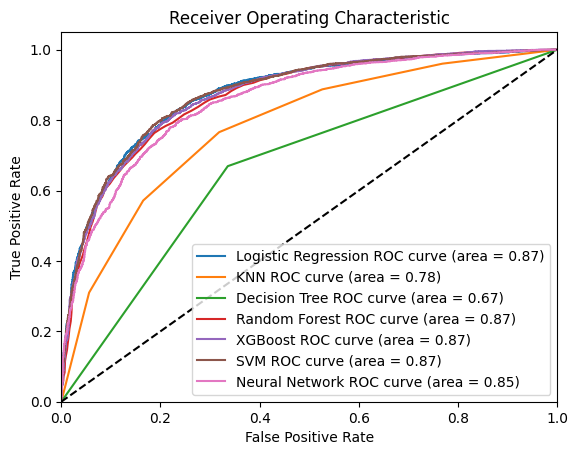

In [31]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
}

# Train and evaluate models
results = []
roc_curves = {}

# Normalization placeholders
acc_list = []
roc_auc_list = []
log_loss_list = []
mse_list = []
time_list = []

for model_name, model in models.items():
    print(f"Algorithm: {model_name}")
    start_time = time.time()
    model.fit(X_train_resampled, y_train_resampled)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_test_pred = model.predict(X_test_transformed)
    prediction_time = time.time() - start_time

    y_test_prob = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"{model_name} Test Data Evaluation:\n{classification_report(y_test, y_test_pred)}")
    accuracy = accuracy_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    
    if y_test_prob is not None:
        roc_auc = roc_auc_score(y_test, y_test_prob)
        logloss = log_loss(y_test, y_test_prob)
        
        fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
        roc_curves[model_name] = (fpr, tpr, roc_auc)
    else:
        roc_auc = None
        logloss = None

    total_time = train_time + prediction_time
    
    # Append metrics to the lists for normalization
    acc_list.append(accuracy)
    roc_auc_list.append(roc_auc)
    log_loss_list.append(logloss)
    mse_list.append(mse)
    time_list.append(total_time)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "ROC-AUC Score": roc_auc,
        "Log Loss": logloss,
        "Mean Squared Error": mse,
        "Training Time (s)": train_time,
        "Prediction Time (s)": prediction_time,
        "Total Time (s)": total_time
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Normalization
results_df['Normalized Accuracy'] = (results_df['Accuracy'] - min(acc_list)) / (max(acc_list) - min(acc_list))
results_df['Normalized ROC-AUC Score'] = (results_df['ROC-AUC Score'] - min(roc_auc_list)) / (max(roc_auc_list) - min(roc_auc_list))
results_df['Normalized Log Loss'] = (max(log_loss_list) - results_df['Log Loss']) / (max(log_loss_list) - min(log_loss_list))
results_df['Normalized Mean Squared Error'] = (max(mse_list) - results_df['Mean Squared Error']) / (max(mse_list) - min(mse_list))
results_df['Normalized Total Time'] = (max(time_list) - results_df['Total Time (s)']) / (max(time_list) - min(time_list))

# Aggregate the normalized scores into a single score
results_df['Aggregate Score'] = (results_df['Normalized Accuracy'] + results_df['Normalized ROC-AUC Score'] +
                                 results_df['Normalized Log Loss'] + results_df['Normalized Mean Squared Error'] +
                                 results_df['Normalized Total Time']) / 5

# Rank the models based on the aggregate score
results_df['Rank'] = results_df['Aggregate Score'].rank(ascending=False)

# Sort the DataFrame by rank
results_df = results_df.sort_values(by='Rank')

# Add the model names to the ranks
ranked_results = results_df[['Model', 'Accuracy', 'ROC-AUC Score', 'Log Loss', 'Mean Squared Error', 'Training Time (s)', 'Prediction Time (s)', 'Total Time (s)', 'Aggregate Score']]

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Add the model names to the ranks
ranked_results = results_df[['Rank', 'Model']].sort_values(by='Rank')

# Print the final DataFrame with ranks and model names
print(ranked_results)

# Plot all ROC curves in one plot
plt.figure()
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
! pip install joblib

In [33]:
import joblib

# Assuming the best model is determined based on aggregate scores
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

# Save the best model to a .pkl file
joblib.dump(best_model, "best_model.pkl")
print(f"Best model ({best_model_name}) saved as best_model.pkl.")



Best model (XGBoost) saved as best_model.pkl.


**Investigate the fraudulant instances of the BAF data-set:**

In [ ]:
# Get feature names after transformation
cat_features_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(cat_features_encoded)

# Convert transformed X_test to DataFrame for display
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Combine the transformed features with the target variable
X_test_transformed_df['fraud_bool'] = y_test.values

# Display the transformed test data with the target variable
#print(X_test_transformed_df.head())

# Filter and display the first 10 fraudulent instances
fraudulent_instances = X_test_transformed_df[X_test_transformed_df['fraud_bool'] == 1]
#print(fraudulent_instances.head(10))
print("Fraudulant instances:")
print(fraudulent_instances.index[:10].tolist(), "and many more...")

Fraudulant instances:
[0, 1, 2, 3, 6, 7, 9, 10, 12, 13] and many more...


**Explainability of the Fraud Classifier**
- Global SHAP explanations
- Local SHAP explanations
- Local LIME explanations
- Local SHAP VS. LIME explanations

Local and Global SHAP:

SHAP Analysis for XGBoost
Local SHAP explainers:


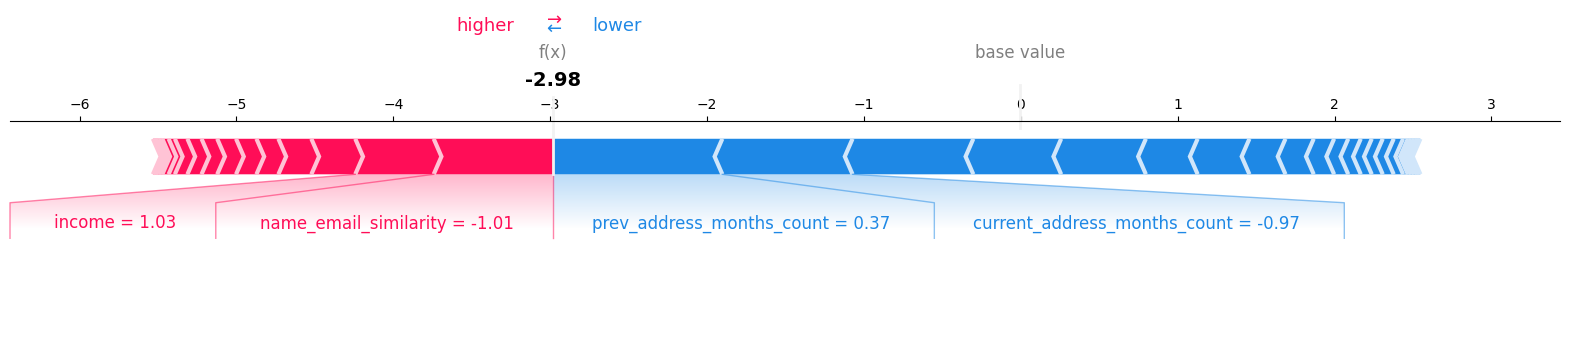

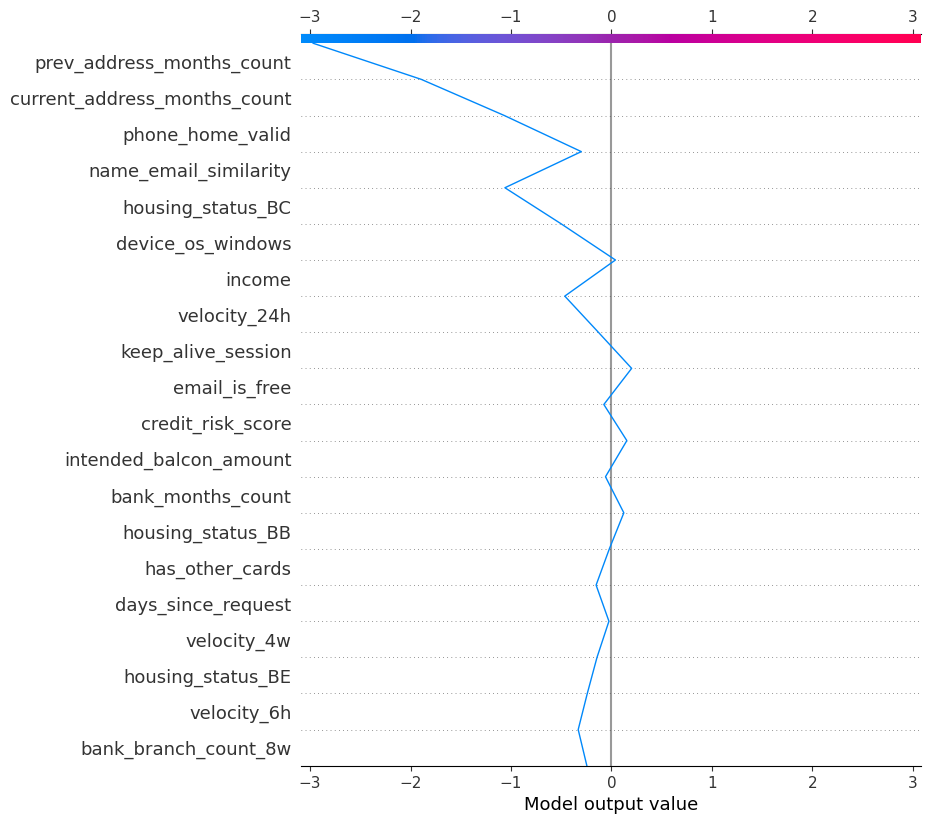

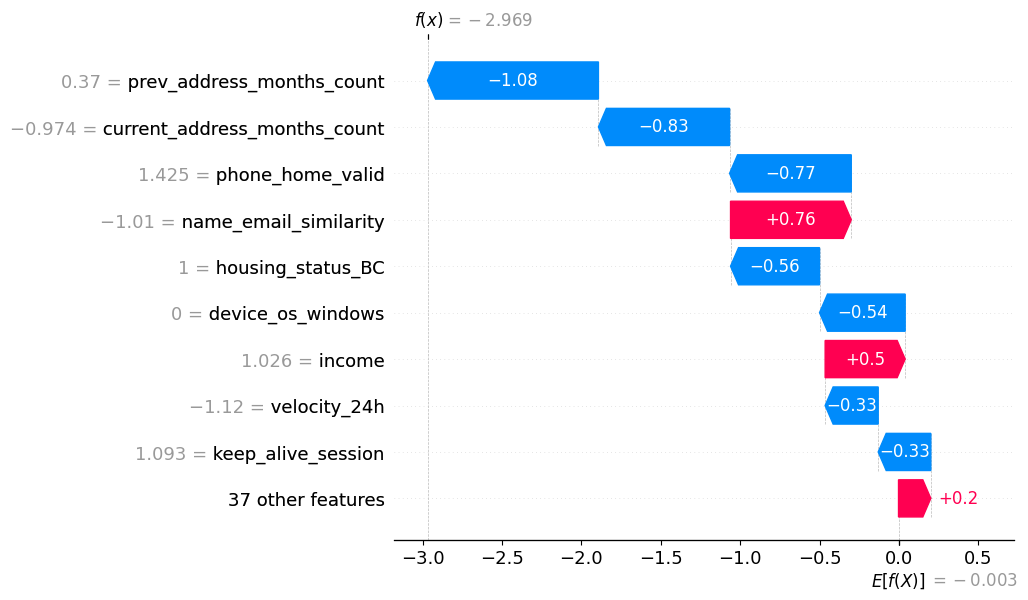

Global SHAP explainers:


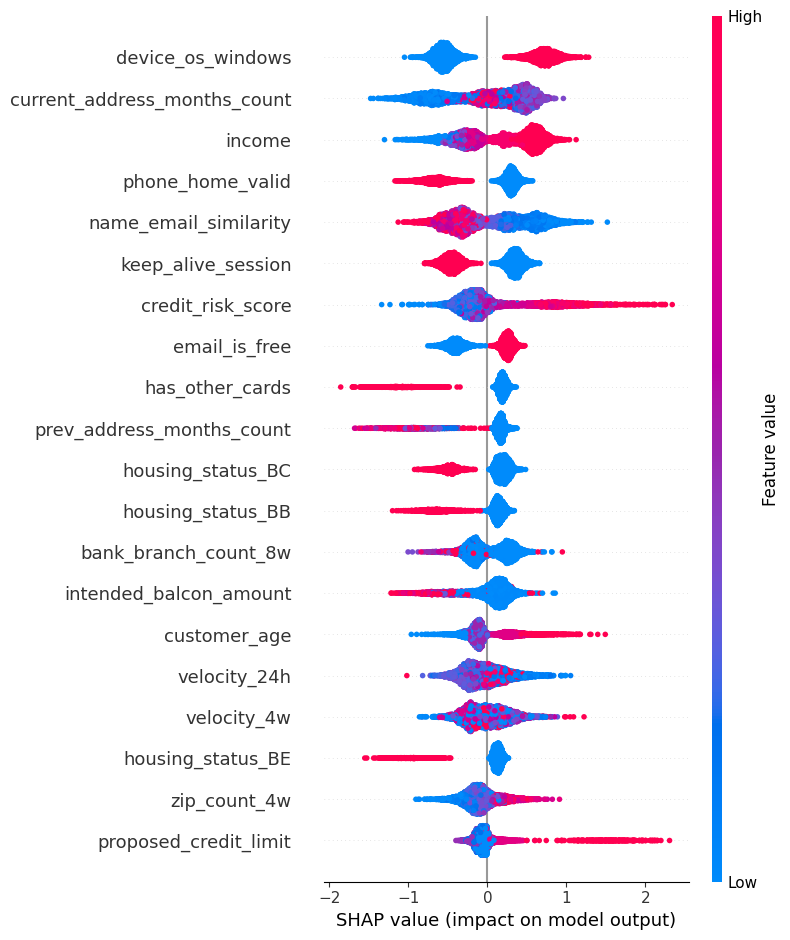

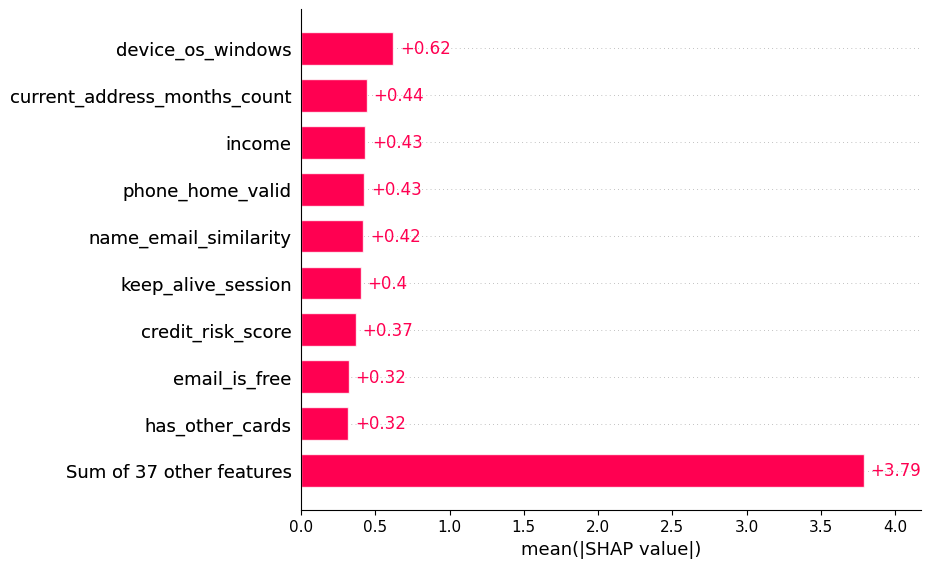

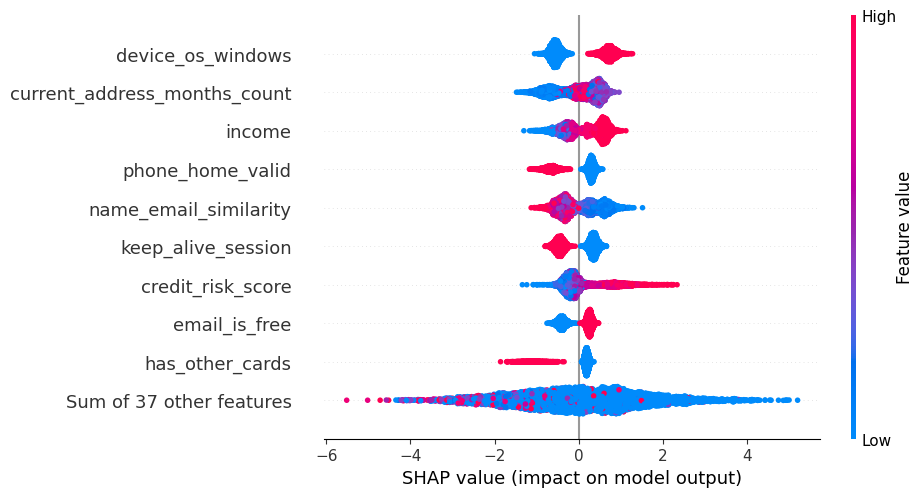

In [ ]:
# Change n to the instance rank that needs to be investigated
n = 4
for model_name, model in models.items():
    if model_name in ["Random Forest", "Decision Tree", "XGBoost"]:
        print(f"SHAP Analysis for {model_name}")
        
        # Use TreeExplainer for tree-based models
        explainer = shap.TreeExplainer(model)
        
        # Get SHAP values, setting check_additivity to False
        shap_values = explainer.shap_values(X_test_transformed, check_additivity=False)
        
       
        
        # Determine the expected value and shap values format
        if isinstance(shap_values, list):  # For classifiers
            instance_shap_values = shap_values[0][n, :]
            expected_value = explainer.expected_value[0]
            shap_values = shap_values[0]
        else:  # For regressors
            instance_shap_values = shap_values[n, :]
            expected_value = explainer.expected_value

        # Round the SHAP values and feature values
        instance_shap_values_rounded = np.round(instance_shap_values, 2)
        instance_data_rounded = pd.Series(np.round(X_test_transformed[n, :], 2), index=feature_names)

        # Local SHAP plots
        print("Local SHAP explainers:")
        # Force plot for the single instance with rounded values
        shap.force_plot(expected_value, instance_shap_values_rounded, instance_data_rounded, matplotlib=True)
        shap.decision_plot(expected_value, instance_shap_values, feature_names)
        shap.waterfall_plot(shap.Explanation(values=instance_shap_values, base_values=expected_value, data=X_test_transformed[n, :], feature_names=feature_names))
        
        # Global SHAP plots
        print("Global SHAP explainers:")
        shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)
        shap.plots.bar(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_transformed, feature_names=feature_names))
        shap.plots.beeswarm(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_transformed, feature_names=feature_names))
        #shap.plots.heatmap(shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_transformed, feature_names=feature_names))

Global SHAP Feature Importance Plot:

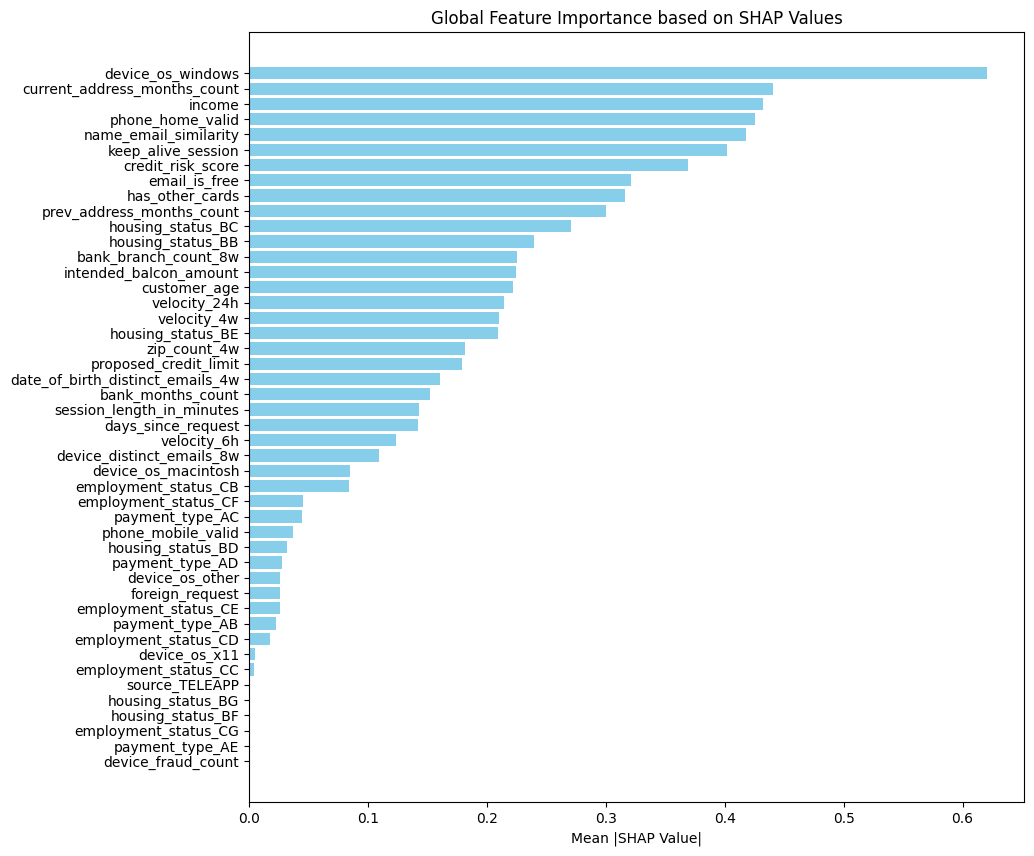

In [ ]:
# Get the mean absolute SHAP value for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)
feature_importance = pd.DataFrame(list(zip(feature_names, mean_shap_values)), columns=['Feature', 'SHAP Value'])

# Sort the DataFrame by SHAP value
feature_importance.sort_values(by='SHAP Value', ascending=False, inplace=True)

# Plotting the feature importance using a bar chart
plt.figure(figsize=(10, 10))
plt.barh(feature_importance['Feature'], feature_importance['SHAP Value'], color='skyblue')
plt.xlabel('Mean |SHAP Value|')
plt.title('Global Feature Importance based on SHAP Values')
plt.gca().invert_yaxis()  # Highest values on top
plt.show()

Local SHAP Feature Importance Plot:

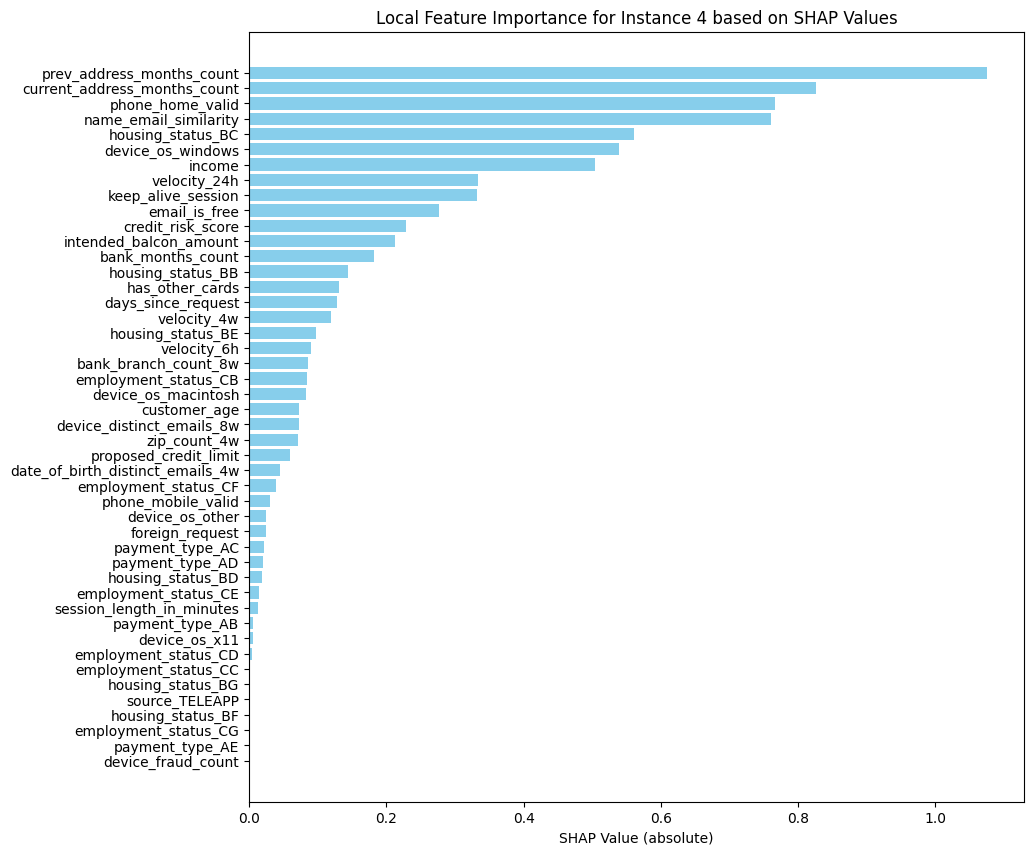

In [ ]:
#n = 4 specific instance to analyze

# Determine the SHAP values format
if isinstance(shap_values, list):  # For classifiers
    instance_shap_values = shap_values[4][n, :]
else:  # For regressors
    instance_shap_values = shap_values[n, :]

# Create a DataFrame for the specific instance
instance_data = pd.Series(instance_shap_values, index=feature_names)

# Sort the DataFrame by SHAP value
instance_data_sorted = instance_data.abs().sort_values(ascending=False)

# Plotting the feature importance using a bar chart
plt.figure(figsize=(10, 10))
plt.barh(instance_data_sorted.index, instance_data_sorted.values, color='skyblue')
plt.xlabel('SHAP Value (absolute)')
plt.title(f'Local Feature Importance for Instance {n} based on SHAP Values')
plt.gca().invert_yaxis()  # Highest values on top
plt.show()

Local LIME explanaitions:

In [ ]:
# LIME analysis
for model_name, model in models.items():
    print(f"LIME Analysis for {model_name}")
    explainer = LimeTabularExplainer(X_train_resampled, feature_names=feature_names, class_names=['Non-Fraud', 'Fraud'], discretize_continuous=True)
    
    # Specify the index of the instance to explain
    instance_index = 4  # Change this index to select a different instance
    
    # Explain the instance
    exp = explainer.explain_instance(X_test_transformed[instance_index], model.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True, show_all=False)

# Show the selected instance's features and predicted class
print(f"Features of instance {instance_index}:")
print(X_test.iloc[instance_index])
print(f"True class: {y_test.iloc[instance_index]}")
print(f"Predicted class: {model.predict(X_test_transformed[instance_index].reshape(1, -1))[0]}")

LIME Analysis for XGBoost


Features of instance 4:
income                                      0.9
name_email_similarity                  0.147824
prev_address_months_count                    26
current_address_months_count                 14
customer_age                                 30
days_since_request                      0.01596
intended_balcon_amount                -0.700835
payment_type                                 AA
zip_count_4w                               3684
velocity_6h                         1800.785621
velocity_24h                        3551.490065
velocity_4w                         4201.448085
bank_branch_count_8w                         22
date_of_birth_distinct_emails_4w              4
employment_status                            CA
credit_risk_score                            85
email_is_free                                 1
housing_status                               BC
phone_home_valid                              1
phone_mobile_valid                            1
bank_months_coun

Local LIME VS SHAP feature improtance Plots:

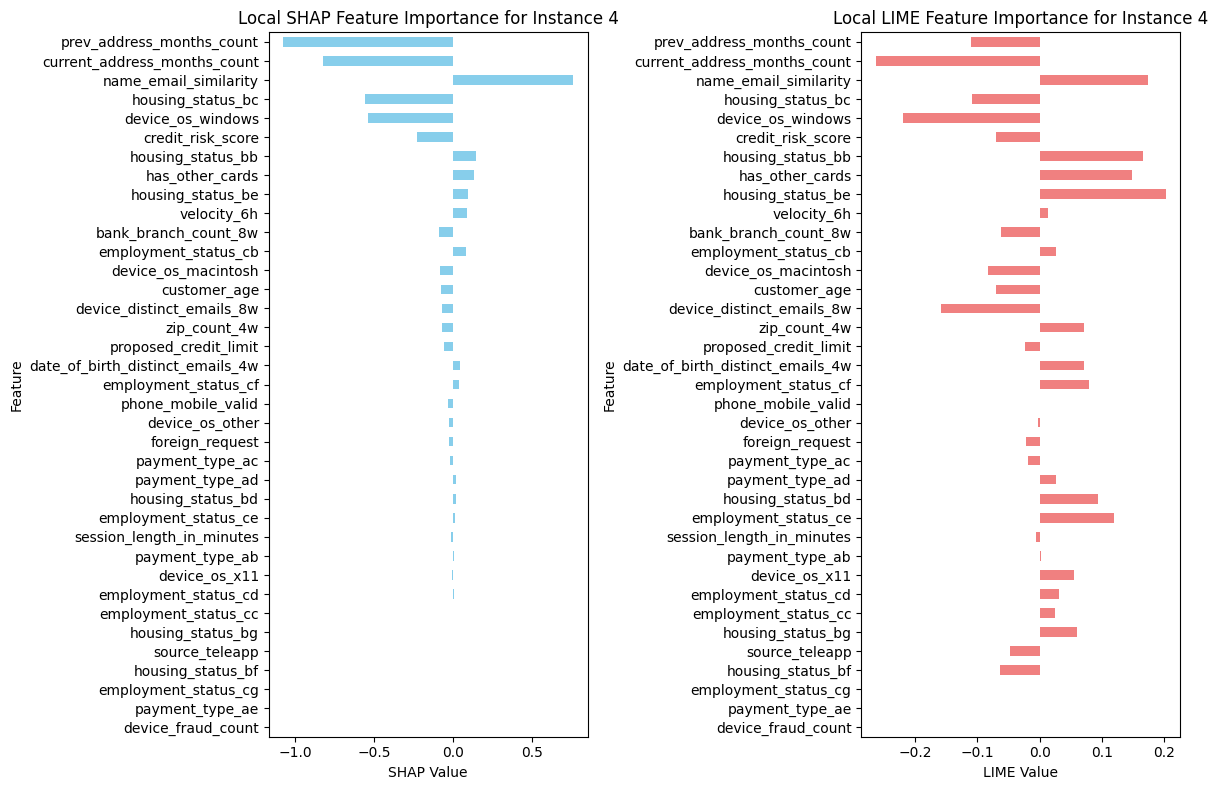

In [ ]:
# Specific instance to analyze
n = 4  

for model_name, model in models.items():
    if model_name in ["Random Forest", "Decision Tree", "XGBoost"]:
        # SHAP analysis
        explainer_shap = shap.TreeExplainer(model)
        shap_values = explainer_shap.shap_values(X_test_transformed)

        if isinstance(shap_values, list):  # For classifiers
            instance_shap_values = shap_values[0][n, :]
        else:  # For regressors
            instance_shap_values = shap_values[n, :]

        # LIME analysis
        explainer_lime = LimeTabularExplainer(
            training_data=X_test_transformed,
            feature_names=feature_names,
            mode='regression' if isinstance(shap_values, np.ndarray) else 'classification'
        )
        lime_exp = explainer_lime.explain_instance(X_test_transformed[n, :], model.predict, num_features=len(feature_names))
        instance_lime_values = dict(lime_exp.as_list())

        # Extract base feature names from LIME
        lime_features = [feature.split(' <= ')[0].split(' > ')[0].split(' < ')[0].split(' >= ')[0].strip() for feature in instance_lime_values.keys()]
        instance_lime_values_base = {lime_features[i]: value for i, (feature, value) in enumerate(instance_lime_values.items())}

        # Convert SHAP values to DataFrame
        shap_df = pd.DataFrame({
            'Feature': feature_names,
            'SHAP Value': instance_shap_values
        }).set_index('Feature')

        # Convert LIME values to DataFrame
        lime_df = pd.DataFrame(instance_lime_values_base.items(), columns=['Feature', 'LIME Value']).set_index('Feature')

        # Ensure feature names are consistent and lowercase to avoid mismatches
        shap_df.index = shap_df.index.str.lower().str.strip()
        lime_df.index = lime_df.index.str.lower().str.strip()

        # Combine SHAP and LIME values into a single DataFrame
        comparison_df = shap_df.join(lime_df, how='inner')

        if comparison_df.empty:
            continue

        # Plotting the comparison
        comparison_df = comparison_df.sort_values(by='SHAP Value', key=abs, ascending=False)

        plt.figure(figsize=(12, 8))

        # SHAP values plot
        plt.subplot(1, 2, 1)
        comparison_df['SHAP Value'].plot(kind='barh', color='skyblue')
        plt.title(f'Local SHAP Feature Importance for Instance {n}')
        plt.xlabel('SHAP Value')
        plt.gca().invert_yaxis()  # Highest values on top

        # LIME values plot
        plt.subplot(1, 2, 2)
        comparison_df['LIME Value'].plot(kind='barh', color='lightcoral')
        plt.title(f'Local LIME Feature Importance for Instance {n}')
        plt.xlabel('LIME Value')
        plt.gca().invert_yaxis()  # Highest values on top

        plt.tight_layout()
        plt.show()
